Davies-Bouldin Index for 8 clusters: 0.938201436296377
Silhouette Score for 8 clusters: 0.30458324130563386
Inertia for 8 clusters: 116.19475190866527


C:\Users\saran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


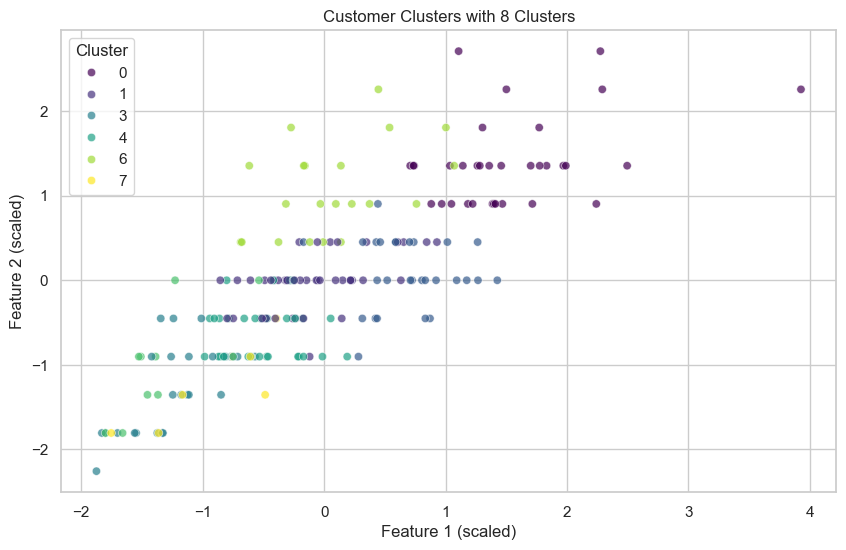

Clustering results saved to Customer_Clusters.csv


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
# Read data from CSV files
customers = pd.read_csv("C:\\Users\\saran\\OneDrive\\Desktop\\Customers.csv")
transactions = pd.read_csv("C:\\Users\\saran\\OneDrive\\Desktop\\Transactions.csv")

# Merge Customers and Transactions datasets
customer_data = pd.merge(customers, transactions, on='CustomerID', how='left')

# Feature Engineering: Aggregate features for clustering
# Total spend per customer
total_spend = customer_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spend.columns = ['CustomerID', 'TotalSpend']

# Number of transactions per customer
num_transactions = customer_data.groupby('CustomerID')['TransactionID'].nunique().reset_index()
num_transactions.columns = ['CustomerID', 'NumTransactions']

# Average quantity purchased per transaction
avg_quantity = customer_data.groupby('CustomerID')['Quantity'].mean().reset_index()
avg_quantity.columns = ['CustomerID', 'AvgQuantity']

# Merge all aggregated features
aggregated_features = total_spend.merge(num_transactions, on='CustomerID').merge(avg_quantity, on='CustomerID')

# Select features for clustering
features = aggregated_features[['TotalSpend', 'NumTransactions', 'AvgQuantity']]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean of each column
features_imputed = imputer.fit_transform(features)

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)


# Perform clustering using KMeans
k = 8  # Number of clusters (can be varied between 2 and 10)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the dataset
aggregated_features['Cluster'] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(features_scaled, clusters)
print(f"Davies-Bouldin Index for {k} clusters: {db_index}")

# Calculate Silhouette Score
sil_score = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score for {k} clusters: {sil_score}")

# Fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Get the inertia value
inertia_value = kmeans.inertia_

# Print the inertia value
print(f"Inertia for {k} clusters: {inertia_value}")

# Visualize the clusters
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features_scaled[:, 0], 
    y=features_scaled[:, 1], 
    hue=clusters, 
    palette="viridis", 
    alpha=0.7
)
plt.title(f'Customer Clusters with {k} Clusters')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(title='Cluster')
plt.show()

# Save the clustering results
aggregated_features.to_csv("Customer_Clusters.csv", index=False)
print("Clustering results saved to Customer_Clusters.csv")
